In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
ADD_C_CYSTEINE_DA = 57.021464  # from Unimod.org
PROTON_MASS = 1.007276

In [3]:
MAXIMUM_Q_VALUE = 0.01

#### prepare MQ results

In [4]:
experiment_name_ek = 'test-ek'
EK_PERCOLATOR_OUTPUT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}/percolator-output'.format(experiment_name_ek)
EK_PERCOLATOR_OUTPUT_FILE_NAME = "{}/{}.percolator.target.psms.txt".format(EK_PERCOLATOR_OUTPUT_DIR, experiment_name_ek)

In [5]:
# read the percolator identifications and throw away the poor quality ones
psms_ek_df = pd.read_csv(EK_PERCOLATOR_OUTPUT_FILE_NAME, sep='\t')
psms_ek_df = psms_ek_df[psms_ek_df['percolator q-value'] <= MAXIMUM_Q_VALUE]
psms_ek_df = psms_ek_df[psms_ek_df['peptide mass'] > 0.0]

In [6]:
psms_ek_df['peptide_mass_modification'] = psms_ek_df.apply(lambda row: row['peptide mass'] + (row.sequence.count('C') * ADD_C_CYSTEINE_DA), axis=1)
psms_ek_df['peptide_mass_difference'] = abs((psms_ek_df['spectrum neutral mass'] + PROTON_MASS) - psms_ek_df['peptide_mass_modification'])
psms_ek_df['mass_error_ppm'] = (abs(psms_ek_df['peptide_mass_difference']) / psms_ek_df['peptide_mass_modification']) * 1e6


In [7]:
psms_ek_df['run_name'] = psms_ek_df.apply(lambda row: 'YHE114_01' if row.file_idx == 0 else 'YHE211_01', axis=1)

In [8]:
psms_ek_df.sample(n=5)

,file_idx,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,peptide_mass_modification,peptide_mass_difference,mass_error_ppm,run_name
18336,0,28064,2,1378.1855,2754.3565,2755.3664,0.289032,0.000488,1.857851e-02,5518.64,IEPELDGSAQVTSHDASTNGLINFIK,sp|P06744|G6PI_HUMAN,KQ,2755.3664,0.002624,0.952323,YHE114_01
6793,0,23433,3,756.3961,2266.1664,2267.1797,0.918548,0.000069,3.187523e-05,5518.64,SLSALGNVISALAEGSTYVPYR,sp|P33176|KINH_HUMAN,KD,2267.1797,0.006024,2.657046,YHE114_01
577,0,8913,2,760.8690,1519.7234,1520.7372,1.627401,0.000069,2.385921e-08,5518.64,DAYSGGAVNLYHVR,sp|P28074|PSB5_HUMAN,RE,1520.7372,0.006524,4.290025,YHE114_01
1940,0,16559,2,944.9696,1887.9247,1888.9314,1.328663,0.000069,4.954416e-07,5518.64,MPELIPVLSETMWDTK,sp|P16521|EF3A_YEAST,RK,1888.9314,0.000576,0.304934,YHE114_01
4833,1,9159,2,771.8672,1541.7199,1542.7314,1.044922,0.000069,8.834732e-06,5518.64,DDILNGSHPVSFDK,sp|Q9Y490|TLN1_HUMAN,RA,1542.7314,0.004224,2.738001,YHE211_01


In [9]:
yhe114_01_ek_df = psms_ek_df[psms_ek_df.run_name == 'YHE114_01'].copy()
# yhe114_01_ek_df.sort_values(by=['mass_error_ppm'], ascending=True, inplace=True)
yhe114_01_ek_df.sort_values(by=['percolator score'], ascending=False, inplace=True)
yhe114_01_ek_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=True)

#### prepare TFD/E results

In [10]:
experiment_name_dwm = 'test-dwm'
DWM_PERCOLATOR_OUTPUT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}/percolator-output'.format(experiment_name_dwm)
DWM_PERCOLATOR_OUTPUT_FILE_NAME = "{}/{}.percolator.target.psms.txt".format(DWM_PERCOLATOR_OUTPUT_DIR, experiment_name_dwm)

In [11]:
# read the percolator identifications and throw away the poor quality ones
psms_dwm_df = pd.read_csv(DWM_PERCOLATOR_OUTPUT_FILE_NAME, sep='\t')
psms_dwm_df = psms_dwm_df[psms_dwm_df['percolator q-value'] <= MAXIMUM_Q_VALUE]
psms_dwm_df = psms_dwm_df[psms_dwm_df['peptide mass'] > 0.0]

In [12]:
psms_dwm_df['peptide_mass_modification'] = psms_dwm_df.apply(lambda row: row['peptide mass'] + (row.sequence.count('C') * ADD_C_CYSTEINE_DA), axis=1)
psms_dwm_df['peptide_mass_difference'] = abs((psms_dwm_df['spectrum neutral mass'] + PROTON_MASS) - psms_dwm_df['peptide_mass_modification'])
psms_dwm_df['mass_error_ppm'] = (abs(psms_dwm_df['peptide_mass_difference']) / psms_dwm_df['peptide_mass_modification']) * 1e6

In [13]:
psms_dwm_df['run_name'] = psms_dwm_df.apply(lambda row: 'YHE114_01' if row.file_idx == 0 else 'YHE211_01', axis=1)

In [14]:
yhe114_01_dwm_df = psms_dwm_df[psms_dwm_df.run_name == 'YHE114_01'].copy()
# yhe114_01_dwm_df.sort_values(by=['mass_error_ppm'], ascending=True, inplace=True)
yhe114_01_dwm_df.sort_values(by=['percolator score'], ascending=False, inplace=True)
yhe114_01_dwm_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=True)

#### merge the two result sets

In [15]:
len(yhe114_01_ek_df), len(yhe114_01_dwm_df)

(11874, 10201)

In [16]:
merged_df = pd.merge(yhe114_01_ek_df, yhe114_01_dwm_df, how='outer', left_on=['sequence', 'charge'], right_on=['sequence', 'charge'], suffixes=['_mq','_tfde'])

In [17]:
merged_df.sample(n=5)

,file_idx_mq,scan_mq,charge,spectrum precursor m/z_mq,spectrum neutral mass_mq,peptide mass_mq,percolator score_mq,percolator q-value_mq,percolator PEP_mq,total matches/spectrum_mq,...,percolator score_tfde,percolator q-value_tfde,percolator PEP_tfde,total matches/spectrum_tfde,protein id_tfde,flanking aa_tfde,peptide_mass_modification_tfde,peptide_mass_difference_tfde,mass_error_ppm_tfde,run_name_tfde
2509,0.0,21882.0,3,723.6891,2168.0456,2112.0343,1.095915,0.000069,0.000005,5518.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7506,0.0,4901.0,2,644.3562,1286.6979,1287.7034,0.572911,0.000069,0.001064,5518.64,...,0.463743,0.000042,0.001580,1385.65,"sp|P00924|ENO1_YEAST,sp|P00925|ENO2_YEAST",KA,1287.7034,0.000576,0.447308,YHE114_01
14652,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.073552,0.002715,0.136380,1385.65,sp|Q04067|EIF3G_YEAST,KE,1631.7573,0.000876,0.536845,YHE114_01
2514,0.0,5457.0,2,663.8398,1325.6650,1326.6754,1.095547,0.000069,0.000005,5518.64,...,0.983693,0.000042,0.000003,1385.65,sp|Q15181|IPYR_HUMAN,KW,1326.6754,0.000324,0.244219,YHE114_01
4715,0.0,20083.0,2,1034.9778,2067.9411,2068.9490,0.838923,0.000069,0.000072,5518.64,...,0.880513,0.000042,0.000012,1385.65,sp|O76003|GLRX3_HUMAN,KQ,2068.9490,0.002176,1.051742,YHE114_01


In [18]:
mq_only_df = merged_df[(merged_df.file_idx_mq == 0) & (merged_df.file_idx_tfde.isnull())].copy()
tfde_only_df = merged_df[(merged_df.file_idx_mq.isnull()) & (merged_df.file_idx_tfde == 0)].copy()
both_df = merged_df[(merged_df.file_idx_mq == 0) & (merged_df.file_idx_tfde == 0)]

In [19]:
len(both_df), len(mq_only_df), len(tfde_only_df)

(7165, 4709, 3036)

In [20]:
mq_only_df['percolator score_tfde'] = mq_only_df['percolator score_tfde'].fillna(0)
tfde_only_df['percolator score_mq'] = tfde_only_df['percolator score_mq'].fillna(0)

In [21]:
linear_df = pd.DataFrame([(0.0,0.0),(3.0,3.0)], columns=['mq','tfde'])

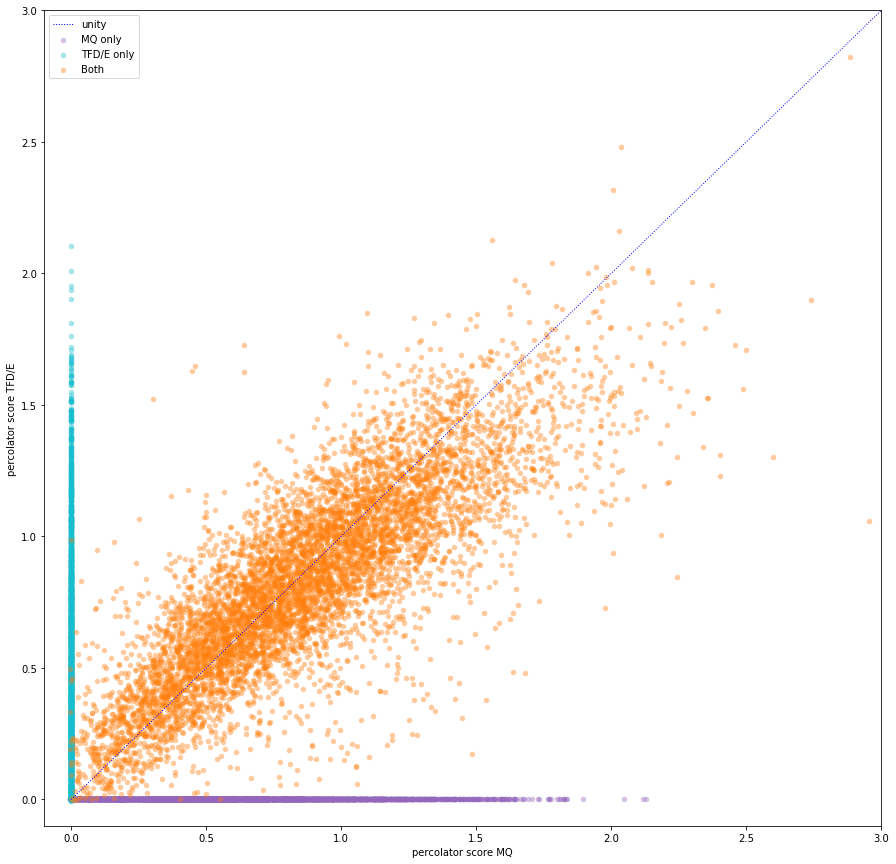

In [22]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)
plt.margins(0.06)

ax.scatter(mq_only_df['percolator score_mq'], mq_only_df['percolator score_tfde'], marker='o', color='tab:purple', lw=0, s=30, alpha=0.4, label='MQ only')
ax.scatter(tfde_only_df['percolator score_mq'], tfde_only_df['percolator score_tfde'], marker='o', color='tab:cyan', lw=0, s=30, alpha=0.4, label='TFD/E only')
ax.scatter(both_df['percolator score_mq'], both_df['percolator score_tfde'], marker='o', color='tab:orange', lw=0, s=30, alpha=0.4, label='Both')

ax.plot(linear_df.mq, linear_df.tfde, marker='', color='blue', linestyle=':', linewidth=1, ms=5, label='unity')

plt.legend(loc='best')
plt.xlabel('percolator score MQ')
plt.ylabel('percolator score TFD/E')

plt.xlim((-0.1,3))
plt.ylim((-0.1,3))

plt.show()

#### plot ppm error

In [23]:
mq_only_df['mass_error_ppm_tfde'] = mq_only_df['mass_error_ppm_tfde'].fillna(0)
tfde_only_df['mass_error_ppm_mq'] = tfde_only_df['mass_error_ppm_mq'].fillna(0)

In [24]:
min_coord = min(both_df['mass_error_ppm_mq'].min(), both_df['mass_error_ppm_tfde'].min(), mq_only_df['mass_error_ppm_mq'].min(), tfde_only_df['mass_error_ppm_tfde'].min())
max_coord = max(both_df['mass_error_ppm_mq'].max(), both_df['mass_error_ppm_tfde'].max(), mq_only_df['mass_error_ppm_mq'].max(), tfde_only_df['mass_error_ppm_tfde'].max())
linear_df = pd.DataFrame([(min_coord,min_coord),(max_coord,max_coord)], columns=['mq','tfde'])

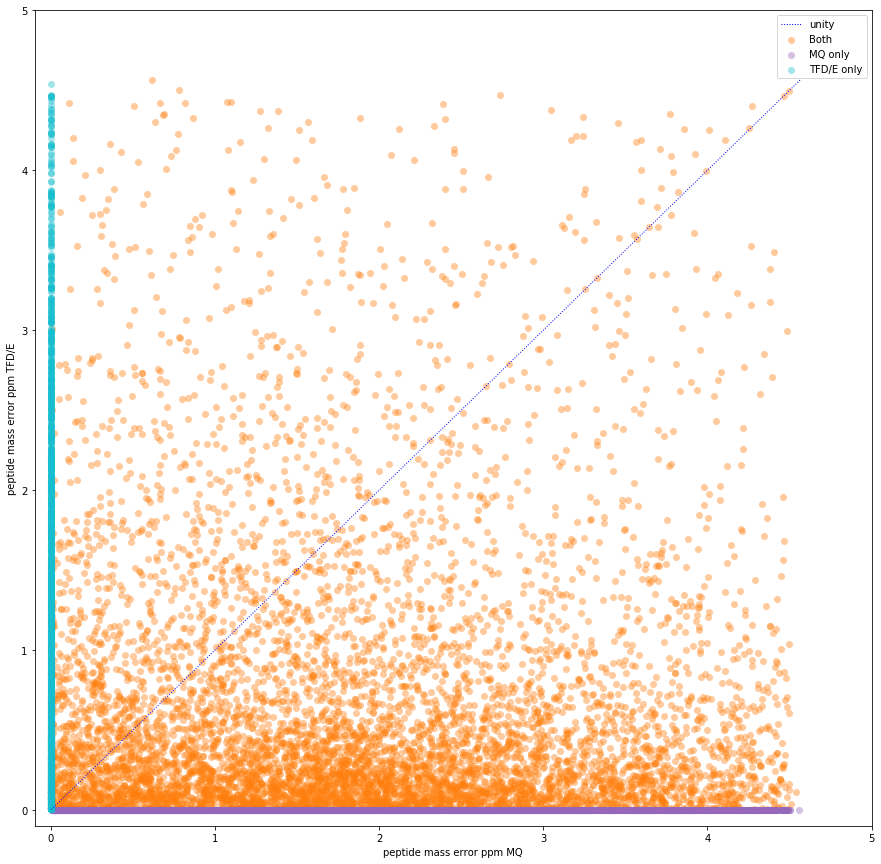

In [25]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)
plt.margins(0.06)

ax.scatter(both_df['mass_error_ppm_mq'], both_df['mass_error_ppm_tfde'], marker='o', color='tab:orange', lw=0, s=50, alpha=0.4, label='Both')
ax.scatter(mq_only_df['mass_error_ppm_mq'], mq_only_df['mass_error_ppm_tfde'], marker='o', color='tab:purple', lw=0, s=50, alpha=0.4, label='MQ only')
ax.scatter(tfde_only_df['mass_error_ppm_mq'], tfde_only_df['mass_error_ppm_tfde'], marker='o', color='tab:cyan', lw=0, s=50, alpha=0.4, label='TFD/E only')

ax.plot(linear_df.mq, linear_df.tfde, marker='', color='blue', linestyle=':', linewidth=1, ms=5, label='unity')

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm MQ')
plt.ylabel('peptide mass error ppm TFD/E')

plt.xlim((-0.1,5))
plt.ylim((-0.1,5))

plt.show()

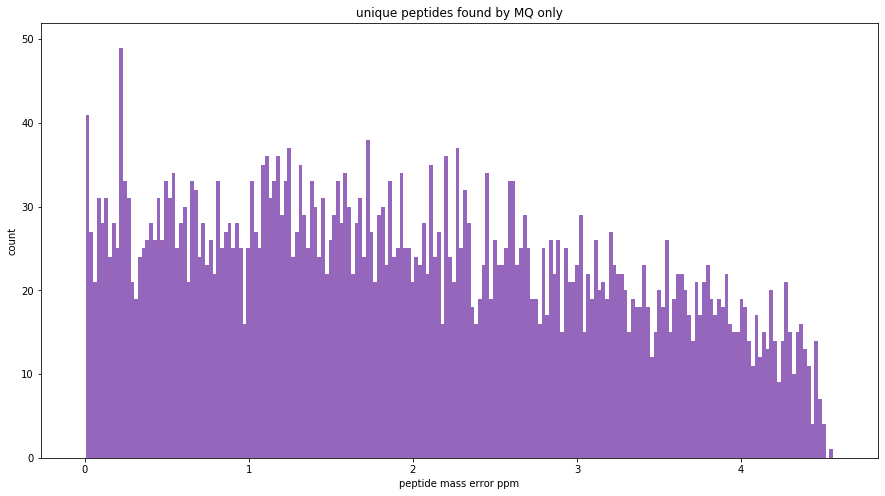

In [35]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 200
hist, bins, _ = plt.hist(mq_only_df['mass_error_ppm_mq'], bins=bins, color='tab:purple')
plt.xlabel('peptide mass error ppm')
plt.ylabel('count')
plt.title('unique peptides found by MQ only')

plt.show()

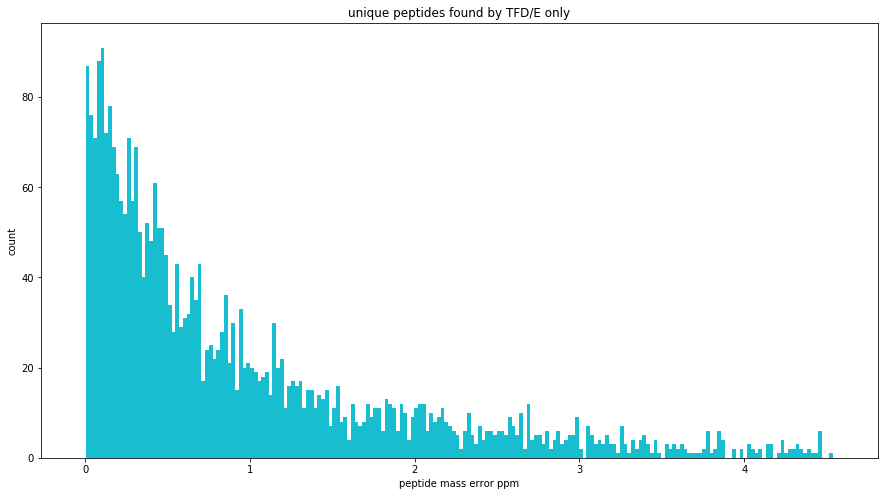

In [37]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 200
hist, bins, _ = plt.hist(tfde_only_df['mass_error_ppm_tfde'], bins=bins, color='tab:cyan')
plt.xlabel('peptide mass error ppm')
plt.ylabel('count')
plt.title('unique peptides found by TFD/E only')

plt.show()

In [29]:
both_df[['sequence','charge','spectrum neutral mass_mq','peptide mass_mq','spectrum neutral mass_tfde','peptide mass_tfde']].sample(n=5)

,sequence,charge,spectrum neutral mass_mq,peptide mass_mq,spectrum neutral mass_tfde,peptide mass_tfde
47,DMGEDLECLCQIMR,2,1767.7121,1654.6823,1767.7191,1654.6823
4577,NQYDNDVTVWSPQGR,2,1776.7930,1777.8020,1776.7995,1777.8020
8345,REELSNVLAAMR,2,1386.7148,1387.7242,1386.7168,1387.7242
1338,NTELSQGTWLNKPK,2,1613.8239,1614.8366,1613.8291,1614.8366
8496,LDHTENDVR,2,1096.5026,1097.5101,1096.5015,1097.5101


In [46]:
# for a low-ppm error MQ-only peptide, find out why TFD/E didn't pick it up
mq_only_df.sort_values(by=['mass_error_ppm_mq'], ascending=True, inplace=True)

In [54]:
mq_only_df[['sequence','charge','scan_mq','spectrum precursor m/z_mq','spectrum neutral mass_mq','mass_error_ppm_mq']].head()

,sequence,charge,scan_mq,spectrum precursor m/z_mq,spectrum neutral mass_mq,mass_error_ppm_mq
8645,QEPDNTGVLLLLSSIHFQCR,3,24296.0,776.0629,2325.1667,0.005159
9589,IVFVPGCSIPLTIVK,2,11268.0,821.4800,1640.9455,0.007308
2710,HFEQFIESGCAK,2,7619.0,726.3288,1450.6431,0.008266
8861,YRNPVSQCMR,2,5214.0,655.3046,1308.5947,0.009163
11069,FMQEAVPEGTGAMAAIIGLDDASIAK,2,27151.0,1303.1420,2604.2694,0.009212


In [ ]:
# load the features extracted by TFD/E for this run
